utils_assignment_bis.py: I just pasted the code here rather than importing to ensure there are no issued with importing files on your end.

In [14]:
import random
import math

def colour_distance(c1, c2):
    rmean = (c1[0] + c2[0]) / 2
    r = c1[0] - c2[0]
    g = c1[1] - c2[1]
    b = c1[2] - c2[2]
    return np.sqrt(((2 + rmean/2356) * r * r) + 4 * g * g + ((2 + ((255 - rmean)/256)) * b * b) )

def read_books_list(file_path):
    book_list = {}
    with open(file_path, 'r') as file:
        for index, line in enumerate(file):
            if index == 0:
                continue  # Skip the first line as it is the header
            line = line.strip().split(',')
            book_list[line[0]] = [int(line[1]), int(line[2]), int(line[3])]
    return book_list

Sample code given in assignment document.

In [15]:
import csv

bl = read_books_list("data_book.csv")
books=list(bl.keys ())
i=5
j=10
print (" distance betwen colour ",books[i],"and",books[j],"is",colour_distance(bl[books[i]],bl[books[j]]))

 distance betwen colour  KBF2 and DLZ8 is 511.71737720140123


##### **Pseudocode**: Adapted Hill Climbing for sorting books

1.   procedure HillClimbing(book_list, max_iterations):
2.   Initialize current_sequence as a random order of books
3. Compute current_score ← TotalScore(current_sequence book_list)
4. for iteration ← 1 to max_iterations do
5. neighbor ← Modify(current_sequence)
6. Compute neighbor_score ← TotalScore(neighbor,book_list)
7. if neighbor_score < current_score then
8. current_sequence ← neighbor
9. current_score ← neighbor_score
10. end if
11. end for
12. return current_sequence, current_score
13. end procedure

In [21]:
# total score is being calculated as the cumulative sums of the colour distances between each book
# the lower this number is, the books that are next to each other are more similar in color
def total_score(sequence, book_list):
    score = 0
    for i in range(len(sequence) - 1):
        book1_id = sequence[i]
        book2_id = sequence[i + 1]
        book1_color = book_list[book1_id]
        book2_color = book_list[book2_id]

        # colour distance takes in the an array of rgb values
        score += colour_distance(book1_color, book2_color)
    return score

# this switches two books with each other and ensures no repetition
def swap_books(sequence):
    i, j = random.sample(range(len(sequence)), 2)
    sequence[i], sequence[j] = sequence[j], sequence[i]
    return sequence

# this is implemented according to the pseudocode above
def hill_climbing(book_list, max_iterations):
    # Step 2
    current_sequence = random.sample(list(book_list.keys()), len(book_list))

    # Step 3
    current_score = total_score(current_sequence, book_list)

    # Step 4
    for iteration in range(max_iterations):
        # Step 5
        neighbor_sequence = swap_books(current_sequence[:])  # Make a copy of the sequence

        # Step 6
        neighbor_score = total_score(neighbor_sequence, book_list)

        # Step 7
        if neighbor_score < current_score:
            # Step 8
            current_sequence = neighbor_sequence
            # Step 9
            current_score = neighbor_score
    # Step 12
    return current_sequence, current_score

In [25]:
# Example usage
book_list = read_books_list("data_book.csv")
max_iterations = 5000  # Define how many iterations to run the hill climbing
results = []

for i in range(20):
  best_sequence, best_score = hill_climbing(book_list, max_iterations)
  results.append({'Run': i + 1, 'Best Total Score': best_score})

# Create a pandas DataFrame for better formatting
df = pd.DataFrame(results)

# Print the results in a table format
print(df)

Best sequence of books: ['FAY4', 'LYX10', 'FWO3', 'DEX8', 'ZWN8', 'CMG3', 'AOG2', 'XGV2', 'LEO4', 'SZE5', 'TFD1', 'GUL8', 'UQK5', 'OUI2', 'SEU4', 'SKL7', 'CBV8', 'JDE7', 'OIY2', 'UDS4', 'AWY9', 'WAI2', 'QWC3', 'KDG2', 'WZQ10', 'VQD3', 'SNF2', 'QUF5', 'CTL8', 'KWO1', 'BGE1', 'IQD10', 'JKL5', 'YSF10', 'EJW6', 'GHS2', 'UPM4', 'LQG2', 'TWR5', 'ZJG7', 'DNT2', 'YMH9', 'ZYI1', 'MXS2', 'YWG7', 'QHG9', 'TYD3', 'YMD1', 'CIL1', 'ZSV10', 'KNO2', 'ZDK8', 'DUF3', 'UTN8', 'PAF1', 'CLY7', 'AYE4', 'KGC8', 'IAL3', 'GWM3', 'VIT3', 'VUM7', 'ERC1', 'VTY8', 'YSC6', 'CBH3', 'VJO1', 'OPS9', 'UHV1', 'XSI2', 'TVO5', 'MUZ10', 'EWF5', 'OST5', 'XTH3', 'QBO8', 'RVG10', 'LPO3', 'UMK8', 'PEB6', 'PFN3', 'RXI1', 'LRH4', 'MFB5', 'ACQ10', 'TEC3', 'YPL9', 'XNY3', 'UGF7', 'QLW5', 'IQR6', 'TPA10', 'FRV10', 'KDO10', 'JZY10', 'FNY5', 'VBD1', 'BGU1', 'FIM1', 'OFC6', 'GCP2', 'POU10', 'SDB6', 'QCJ1', 'RXE4', 'KQY7', 'AVI4', 'YRW9', 'BSH6', 'IZV9', 'KBF2', 'DWX7', 'LWP3', 'CZD6', 'DUE4', 'IZV2', 'DFL8', 'UBX2', 'WPL10', 'TEC1', '

## Question 1a and 1b

**Best Sequence: Iteration 3**

Score: 187485.02564826107

Sequence: ['ITX10', 'WXZ8', 'IZV2', 'SEU4', 'VJX5', 'XOH5', 'GPR4', 'JDE7', 'ESR10', 'FMU1', 'GNY5', 'TFD1', 'CXL7', 'ZWN8', 'PWT6', 'FQN1', 'KWR5', 'HZR3', 'RCH7', 'HPO4', 'ZTY7', 'NLS5', 'OZB10', 'TZX8', 'HIP1', 'NOL1', 'NLB9', 'CPH10', 'VSJ7', 'VJO1', 'QPZ6', 'SRF5', 'ZGO10', 'RBL8', 'VUM7', 'ORC1', 'EJK7', 'CXQ10', 'TUF3', 'XVU6', 'IGY10', 'PZW6', 'SLY5', 'IRC3', 'CRU6', 'XLR8', 'RXB4', 'CNZ5', 'VJW3', 'YPM10', 'MBO10', 'GUK10', 'GWM3', 'WEZ9', 'MHG3', 'BGJ6', 'AHZ3', 'TJU4', 'VOK1', 'HXI9', 'KBJ10', 'NXV6', 'CRF3', 'CMA6', 'PWC4', 'DSB3', 'REY9', 'OIB1', 'YMH9', 'LQY2', 'DLZ8', 'LSM7', 'MLJ10', 'UGW2', 'WDV2', 'AHB1', 'YDS2', 'JXF9', 'CPD8', 'LVY3', 'NLX6', 'IOE7', 'WRG7', 'PDC5', 'JIC7', 'IMV5', 'XRI4', 'SZE5', 'KAP7', 'ZGT4', 'CFL8', 'IVE3', 'PMO4', 'CZM1', 'FVR6', 'KVO2', 'WNL9', 'LQI3', 'APN6', 'YEA8', 'NEZ7', 'SBH3', 'DIF6', 'TEI9', 'XHN6', 'HWX7', 'VQD3', 'IHR9', 'XKT4', 'SJF1', 'CMY9', 'ESO9', 'ZDX4', 'UXO9', 'YVS5', 'AEC1', 'YDH1', 'QBA3', 'GHM1', 'EJW6', 'MDK2', 'JWU1', 'QYV4', 'STR6', 'BGW10', 'URP1', 'JSC5', 'BHF8', 'VKP4', 'DPB2', 'GCO3', 'GYE5', 'MUZ10', 'CMG3', 'NLY1', 'IHE7', 'JXT4', 'ALH1', 'JQB3', 'QJM10', 'YWG7', 'ZMA5', 'JZI7', 'DMV7', 'SZK6', 'YBU10', 'AIB9', 'KGQ1', 'LXC10', 'QSL6', 'TOI1', 'WPL10', 'NBZ6', 'PJK5', 'PFD3', 'COH7', 'TFN6', 'SVU9', 'WHA10', 'RHF10', 'BVW5', 'ZOH4', 'TJS6', 'IVO10', 'CDJ4', 'OBR4', 'CQD5', 'MPA3', 'MPZ5', 'RXI1', 'WUD9', 'PNV2', 'HQC4', 'SPG3', 'TGM5', 'OHD9', 'DHV3', 'EAC3', 'DYU8', 'HZJ8', 'DYM3', 'VRF8', 'OID5', 'AIH4', 'FND9', 'GOS9', 'TMV3', 'MEQ10', 'OLF2', 'UBI9', 'EFM3', 'ZJV6', 'SLB8', 'JQY4', 'YOG3', 'CHP3', 'XIH2', 'XGQ5', 'VTP10', 'BCU1', 'VRZ2', 'HKT6', 'NQG4', 'DEX8', 'OKD8', 'IAL3', 'VSG7', 'RPG3', 'GSB2', 'LQM8', 'JEB9', 'DWX7', 'GUI8', 'CWM7', 'VJB3', 'FTW2', 'OFZ6', 'TVS2', 'GQF4', 'FUO6', 'YPL9', 'QHG9', 'NYI2', 'TBY6', 'WCI4', 'FVO1', 'OJG9', 'EXO9', 'UNW3', 'ATZ8', 'BSF10', 'RNI1', 'WZJ5', 'JIM8', 'TNW1', 'PUX7', 'VJI6', 'VTX6', 'FKO7', 'HQL10', 'FRV10', 'EWF5', 'PIK1', 'GBT8', 'OFC6', 'VOB9', 'DHR4', 'QSW4', 'WLG2', 'JBD9', 'CGM6', 'ZBO1', 'WDB5', 'HQU1', 'YMD1', 'GKR9', 'LQN5', 'JYP2', 'PGS3', 'RFX9', 'DLX8', 'JTC2', 'DIG7', 'VPQ8', 'FCG7', 'KIE8', 'KBE6', 'YCR1', 'YLU2', 'SKY2', 'VCG8', 'ZME2', 'LPO3', 'WXD5', 'RPZ10', 'APD6', 'UPY2', 'IQD10', 'WQD8', 'GYU8', 'TWZ9', 'YUC9', 'LJQ4', 'LBJ8', 'VNX4', 'HRD5', 'CDO9', 'LRD1', 'OJY5', 'UJI8', 'FIJ3', 'JMV2', 'OAG5', 'UMK8', 'TEC3', 'YTZ3', 'UPM4', 'OVB1', 'GAW7', 'GIS6', 'SXQ2', 'BXA9', 'KUE3', 'KNC1', 'OPS9', 'YSF10', 'YRW9', 'MGX2', 'SKB4', 'WQI3', 'GCP2', 'UXT7', 'XTH3', 'TFD8', 'QLW5', 'ABM5', 'SDT6', 'DGP2', 'VMP3', 'BIC1', 'WBC6', 'UVC2', 'ASY10', 'QMP8', 'PFN3', 'XWR2', 'OST5', 'LHP4', 'XQV3', 'JNG10', 'ZGP5', 'OJU6', 'LWP3', 'MXS2', 'KOY3', 'TFY10', 'TVK2', 'MRT5', 'GEO3', 'UAY2', 'PQA9', 'FVA2', 'LVF9', 'WXI1', 'KXZ8', 'POA9', 'PHR9', 'JWC5', 'FPT4', 'IDU2', 'BZI4', 'RLC6', 'KLS2', 'BPG4', 'BSI3', 'NPK6', 'BGU1', 'HSF8', 'LZH7', 'NAV8', 'UHV1', 'KAZ5', 'ISW10', 'PAF1', 'CMS6', 'FWZ1', 'STY5', 'BYP6', 'VIT3', 'JZA6', 'DFS4', 'IQB3', 'MWT5', 'ZWL7', 'HBU9', 'IBV1', 'JFB6', 'ZHW8', 'OGF3', 'DUE4', 'CLD7', 'JBN3', 'JKS3', 'WCH10', 'WBM7', 'ACQ10', 'SLH4', 'FAD6', 'EPI1', 'YPX8', 'RFX6', 'BRA9', 'NDA1', 'BGE1', 'GIA2', 'AOK6', 'QUG6', 'PFY3', 'WHD7', 'SHN1', 'WZQ10', 'DHL3', 'JVH8', 'PDE8', 'LUS10', 'DBU6', 'DVO5', 'ZYL4', 'QYD7', 'DFQ10', 'XSI2', 'PWF10', 'QDM3', 'ONL7', 'ZMJ3', 'TAM7', 'UGD10', 'QCZ6', 'XNG5', 'WMY1', 'TJI7', 'KQV1', 'XJK2', 'LSR2', 'DNY7', 'TRV1', 'EYD4', 'AFM4', 'DVG9', 'PXC5', 'DBZ9', 'VNI1', 'BRG6', 'CLY7', 'DXK5', 'JEP2', 'VJZ3', 'LRG7', 'JMW3', 'TFK10', 'MJV10', 'JDL9', 'NEI6', 'BAY2', 'TAV7', 'DLN7', 'ABK8', 'TWM2', 'HFV9', 'SAT1', 'FDK1', 'QBR8', 'YHN8', 'ZRF7', 'FPG10', 'TEL5', 'DQY5', 'DWQ6', 'LUI9', 'WCE3', 'AJU2', 'NOC6', 'KQY7', 'HDU9', 'XGB4', 'COT4', 'NME6', 'KEQ1', 'RIO6', 'HXN6', 'EOK10', 'XNQ3', 'OQL4', 'LOJ5', 'HGD4', 'PXH2', 'AEW10', 'TVO5', 'JDK3', 'QWJ8', 'EML5', 'JEN4', 'MLD1', 'XGV2', 'PRM3', 'TWR5', 'AJR5', 'FNY5', 'GMN5', 'WQD4', 'TQA7', 'CDY10', 'JHS10', 'FKE8', 'KDU6', 'REI7', 'FNB6', 'QYO4', 'WAI2', 'SYT3', 'NXF7', 'GMY4', 'XLA4', 'SUE9', 'WDG7', 'VDP3', 'IWD8', 'YVI4', 'NKR3', 'HVE9', 'LNA10', 'HQC8', 'CRQ5', 'ABP2', 'TUZ6', 'GKP7', 'LAM10', 'AXU4', 'VTP6', 'ONL3', 'SXO4', 'AWY9', 'VMO10', 'LRH4', 'ZGX8', 'WTQ9', 'ZMV5', 'WLN9', 'QIE9', 'CBV8', 'NSP3', 'TYM10', 'EIF6', 'OSW4', 'KEO9', 'UKV10', 'PKY9', 'XGZ3', 'CNB3', 'JNM7', 'NWV1', 'HMV7', 'LVC1', 'MIN2', 'LRN9', 'IZV9', 'ULW6', 'EUS4', 'RVG9', 'DVF1', 'BRX8', 'BVH6', 'DGU8', 'ELF2', 'BJF1', 'TGQ6', 'BYR2', 'JXL5', 'BZI8', 'OPB6', 'TEC1', 'ZSM8', 'TLN5', 'XEO4', 'BRH1', 'XNY8', 'KEV5', 'LHE8', 'SGP5', 'WKB1', 'ZVE7', 'RLA3', 'RVG10', 'KDG2', 'ZJU1', 'JKE5', 'IZF9', 'GHS2', 'PYE6', 'ULC7', 'SBA3', 'YIF5', 'DVQ9', 'BYU3', 'YKF8', 'BLS2', 'OSV6', 'KJS8', 'IUQ2', 'AGS5', 'JZB2', 'RJV10', 'SLO10', 'HFT4', 'IUO1', 'ZDK8', 'CBH3', 'CMB7', 'HJZ5', 'APG5', 'CGF7', 'SJA4', 'LED8', 'JED10', 'YZT3', 'TXR10', 'OFL4', 'GBF2', 'QYG8', 'MTK1', 'MJT8', 'WMO4', 'DYI5', 'SHT8', 'FZR5', 'DQR1', 'SUV5', 'WIX10', 'YAH10', 'PEB6', 'UYX5', 'YWN10', 'RWA9', 'BDQ4', 'LSG1', 'ZHF4', 'PXZ7', 'OCY10', 'UGF7', 'DLY9', 'JPF9', 'PTL1', 'AXL2', 'WPS10', 'LSJ1', 'RVP4', 'POU10', 'JWG9', 'DFS10', 'THX10', 'CAY8', 'PBV6', 'UCL3', 'OIZ10', 'NSF1', 'KIS10', 'OKG9', 'JIG5', 'GFD2', 'FVI4', 'TJX3', 'XFW4', 'WHI5', 'GBO8', 'KPW5', 'GES5', 'DQP5', 'JZY10', 'AEY6', 'TEX3', 'CTL8', 'ULG9', 'MYA5', 'WAR4', 'VRN4', 'MFN5', 'WET2', 'AYE4', 'QUF5', 'VKN4', 'IJM3', 'ZLI3', 'PFY5', 'YFJ6', 'GUL8', 'QVU6', 'UXB8', 'HBT10', 'IXZ6', 'ZUK2', 'KDO10', 'EYG4', 'VKE9', 'HEC10', 'NBW10', 'RUT7', 'XYE6', 'LJK9', 'WLN8', 'XGL9', 'PVH5', 'UAZ2', 'VWP6', 'VTY8', 'YHA8', 'ENF1', 'ENH9', 'SAQ8', 'MHK6', 'UXT5', 'JBN2', 'LXW4', 'NFL3', 'KGC8', 'FLG6', 'WEI10', 'IFY10', 'YFG9', 'KUZ5', 'XBG10', 'LGB2', 'SVU2', 'RBF3', 'AUQ7', 'EID7', 'BQC10', 'VTF4', 'SMO6', 'PCD7', 'IMD4', 'GWZ2', 'VUE2', 'TVN10', 'KVC10', 'MRT3', 'YGD4', 'XAF4', 'YED5', 'LIX1', 'ZTR7', 'WVI8', 'CYN2', 'ATG1', 'GRC5', 'ZNG6', 'UTN8', 'DUI1', 'ZCT10', 'KMU7', 'DIC6', 'ERC1', 'WVO9', 'LQD6', 'TVU6', 'ZSV10', 'MXW1', 'OMI9', 'RYJ3', 'QRJ8', 'BSH6', 'IGB4', 'OFN9', 'WED2', 'AYX4', 'UGJ10', 'EIJ4', 'IFD6', 'WYI1', 'SIP1', 'CIL1', 'RVF4', 'UFB1', 'WUS8', 'ALO10', 'CLO2', 'KNO2', 'YNJ4', 'BHA6', 'BYF1', 'EUN9', 'QWI7', 'RNI5', 'AQU10', 'KBF2', 'MNY10', 'KQG10', 'WSO1', 'OHT6', 'RMO6', 'VYJ4', 'PIV6', 'VEW1', 'XUL7', 'CAI1', 'BVJ2', 'VAF5', 'QHP10', 'TPA10', 'DUJ2', 'NAG4', 'HTC4', 'OUI2', 'UQK5', 'FHI4', 'FIM1', 'HLU4', 'KSF1', 'PXT3', 'LIB2', 'MYO4', 'OZT9', 'TWF6', 'EMF4', 'ARB1', 'KHD10', 'GML4', 'CAT5', 'ZWX9', 'RZO7', 'CKM9', 'QIB7', 'HPT5', 'RXE4', 'TEH5', 'BOJ10', 'YMG2', 'NQT6', 'OYF9', 'DNT2', 'VFL7', 'AJO7', 'DIL2', 'QTH6', 'MAT2', 'TSO5', 'FEZ7', 'FWO3', 'IZR6', 'VBD1', 'KXJ9', 'BHR7', 'ZLO2', 'WEU2', 'IJT1', 'SFP7', 'MLZ8', 'IMB9', 'VKA2', 'MHV2', 'IVL8', 'QKW6', 'AOG2', 'EWV2', 'DPM7', 'JQB9', 'HUQ5', 'HFR2', 'ZJG7', 'EFU10', 'UAX7', 'FAY4', 'LBV6', 'WIS2', 'KWO1', 'OYK10', 'QCJ1', 'DMC10', 'FGH3', 'LQG2', 'GNP1', 'ZXF8', 'MFB5', 'WPY4', 'OPA5', 'BAJ10', 'TNP2', 'OEW4', 'TLM8', 'BIJ7', 'JAK9', 'NVA1', 'ZYI1', 'DNW8', 'SOK3', 'GXM10', 'IOP8', 'KUQ3', 'DFL8', 'QUW1', 'URM3', 'ODC8', 'IQR6', 'KZB10', 'GWI9', 'UBX2', 'CEY9', 'GJD10', 'KIQ5', 'JTO2', 'TZL9', 'EPZ1', 'DYB2', 'GSP9', 'IVT4', 'ILJ5', 'OIY2', 'TKP1', 'ZMF1', 'YOW2', 'OVZ4', 'LUR1', 'VMT6', 'GDO2', 'TYE8', 'NIL8', 'IMK5', 'SKL7', 'YMK5', 'VEH7', 'ZIU1', 'ZCB1', 'DUF3', 'XMH5', 'LRT6', 'QBA10', 'CIS8', 'NAM6', 'ZUM5', 'CHN5', 'VUY8', 'AQC1', 'DAP9', 'DMY6', 'FNK3', 'GUA2', 'VAS2', 'GZX8', 'MNT8', 'QWC3', 'UQJ2', 'FWZ4', 'ARO1', 'WJP2', 'HOR5', 'HKA2', 'YRW5', 'ZBA3', 'ZYE9', 'KGV5', 'FLW8', 'RON10', 'PGH2', 'QKU9', 'ECV6', 'YQL1', 'SDB6', 'QNK1', 'MNC2', 'LKG7', 'QCI1', 'LEO4', 'UDS4', 'XDU1', 'XWR10', 'TGY6', 'HWO9', 'DFK6', 'ONP5', 'SUC4', 'TGJ3', 'SNF2', 'YJL10', 'FHE9', 'VGP3', 'MXW4', 'RTV1', 'GHT10', 'NTI3', 'UBF3', 'DKM10', 'LMI8', 'MKR7', 'BKH6', 'TWG8', 'NSL4', 'DKO10', 'WZN4', 'OEU3', 'NPH9', 'KEU5', 'EVD1', 'YSC6', 'JKT5', 'NIK8', 'AXL6', 'WJE10', 'NLB3', 'YXU4', 'JKL5', 'DNL4', 'TYD3', 'QON7', 'PKM9', 'CGS9', 'ZJA3', 'QBO8', 'KQC7', 'VXK8', 'SWQ8', 'UJG7', 'UJA4', 'UTP1', 'XNY3', 'PTZ4', 'KZJ9', 'FDJ1', 'LYX10', 'WMY3', 'RMA4', 'OGY2', 'ZEV8', 'JEM1', 'VIR6', 'UWV2', 'CZD6', 'HKQ1', 'UJB5', 'JPV10', 'TRB1', 'EHJ4', 'AVI4', 'IMX9', 'ZIK8', 'NUV1', 'YEW7', 'MAP9', 'ACS10', 'ZTQ7', 'WPZ8', 'BHP4', 'NVU8', 'NWR1', 'KTX10', 'SRP6', 'BVM4', 'WLU9', 'OJG7', 'AGL1', 'EKU5', 'SCR2', 'SZU9', 'QVR7', 'XEN9', 'EWD4', 'FLU7', 'WJR9', 'JLN3', 'CKG7', 'GFQ10', 'ITH8', 'ZOA4', 'RTP8', 'GMD10', 'RYN3', 'ILM10', 'LAE10', 'EXI2', 'PWL4', 'YAD2', 'LPX7', 'KVE7', 'OCY8', 'RKN8', 'CLP6', 'DUL1', 'TZB2', 'HLX7', 'LEH5', 'VDA6']


## Question 1c

In [ ]:
# Plotting the data
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(df['Run'], df['Best Total Score'], marker='o', linestyle='-', color='b', label='Best Total Score')

plt.xlabel('Run')
plt.ylabel('Best Total Score')
plt.title('Best Total Score across 10 Runs')

plt.grid(True)
plt.legend()

plt.show()


I think these solutions are good but can be improved.
After using a generic neighboring alogrithm where the funcion swap_books switches books with its nextdoor neighbor, I was curious to see how other swapping alogrithms can improve the score. I implemented an algorithm that swaps blocks of books rather than individual books. The block size can be altered and observed how the block size affects the final_score. Additionally, the number of iterations can also be altered to see how it improves the score. Since the dataset is large, swapping blocks of books can be more efficient rather than individual books themselves. It takes a little bit more time, but if the library has a few months and willing to have a more accurate order of books on the display, this will be a better method.

In [41]:
def BlockSwap(current_sequence, block_size):
    # Conduct a length check on the given block size.
    # The first edge case is comparing the length of sequence given and the block size
    n = len(current_sequence)
    if n < 2 * block_size:
        return current_sequence  # Not enough elements to swap two blocks

    # Select two distinct start indices for the blocks
    i, j = random.sample(range(n - block_size + 1), 2)

    # Ensure the blocks don't overlap given the random indices selected before
    while abs(i - j) < block_size:
        i, j = random.sample(range(n - block_size + 1), 2)

    # Make sure i < j for simplicity
    if i > j:
        i, j = j, i

    # swap blocks
    current_sequence[i:i+block_size], current_sequence[j:j+block_size] = \
        current_sequence[j:j+block_size], current_sequence[i:i+block_size]

    return current_sequence

# this is implemented the same as above but used the new neighbor function
def hill_climbing_2(book_list, max_iterations):
    current_sequence = random.sample(list(book_list.keys()), len(book_list))
    current_score = total_score(current_sequence, book_list)

    for iteration in range(max_iterations):
        # the block size is set to 5 but this can be changed based on how unordered the data is
        neighbor_sequence = BlockSwap(current_sequence[:], 5)

        neighbor_score = total_score(neighbor_sequence, book_list)

        if neighbor_score < current_score:
            current_sequence = neighbor_sequence
            current_score = neighbor_score

    return current_sequence, current_score


In [42]:
# Example usage
book_list = read_books_list("data_book.csv")
max_iterations = 5000  # Define how many iterations to run the hill climbing
results = []

for i in range(20):
  best_sequence, best_score = hill_climbing(book_list, max_iterations)

  results.append({'Run': i + 1, 'Best Total Score': best_score})

df = pd.DataFrame(results)

print(df)

Best sequence of books: ['ZYI1', 'FRV10', 'HQC4', 'MYO4', 'OZT9', 'ULG9', 'ZHF4', 'JKS3', 'LJQ4', 'LUS10', 'DAP9', 'ITX10', 'UQK5', 'UXB8', 'WPZ8', 'JFB6', 'FLG6', 'GMD10', 'PCD7', 'GUI8', 'IUO1', 'SVU2', 'TZL9', 'GPR4', 'ZTQ7', 'TEX3', 'EFU10', 'XOH5', 'JPF9', 'TEC3', 'TAM7', 'PAF1', 'TBY6', 'CBH3', 'PTZ4', 'LBV6', 'RMO6', 'VTF4', 'CZM1', 'WVI8', 'RPZ10', 'KZJ9', 'MNT8', 'AYX4', 'DLY9', 'PXT3', 'SAQ8', 'NAG4', 'AEW10', 'BKH6', 'AXL6', 'VWP6', 'ERC1', 'TEI9', 'HMV7', 'KNO2', 'LUR1', 'EKU5', 'DHR4', 'XVU6', 'LPX7', 'JBD9', 'QPZ6', 'DFK6', 'MJT8', 'LOJ5', 'QTH6', 'QKU9', 'BIC1', 'ECV6', 'SZE5', 'SOK3', 'BJF1', 'OYK10', 'YXU4', 'QVU6', 'VKN4', 'KBE6', 'OSW4', 'ZNG6', 'KVO2', 'KUE3', 'EPI1', 'KWO1', 'WLN8', 'AEY6', 'SLH4', 'GIS6', 'TNW1', 'REI7', 'EYD4', 'WCH10', 'PGS3', 'TFY10', 'ZIK8', 'WMY3', 'DKO10', 'TVO5', 'ZGO10', 'KZB10', 'NPH9', 'QYD7', 'YMG2', 'HKA2', 'BHF8', 'TVN10', 'ATG1', 'HPT5', 'ZIU1', 'OJY5', 'OFL4', 'GFQ10', 'QIE9', 'BAY2', 'TAV7', 'DVG9', 'MJV10', 'LQG2', 'BCU1', 'BXA9',

## Genetic Algorithms

utils_assignment_bis.py: I just pasted the code here rather than importing to ensure there are no issued with importing files on your end.

In [45]:
### useful for genetic algorithms
import numpy as np

# adjust fitness so it more likely that goood individual are selected
def population_fitness(population,book_list):
    td= [1/(total_score(individual, book_list)/10000) for individual in population]
    fitness = np.exp(td)
    return fitness

def weighted_choice(population,fitness,num_choices):
    max = sum([c for c in fitness])
    selection_probs = [c/max for c in fitness]
    indices = np.random.choice(len(population), size=int(num_choices), replace=True, p=selection_probs)
    return indices

def reproduction(parent1, parent2):
    child = parent2.copy()  # Start with a copy of parent2
    i = random.randint(0,len(parent1))  # choosing crossover points
    j = random.randint(i,len(parent1))  # choosing crossover points
    child[0:i] = parent1[:i]
    child[j:len(parent1)] = parent1[j:len(parent1)]
    # check for duplacate
    element_count = {}
    for element in child:
        if element in element_count:
            element_count[element] += 1
        else:
            element_count[element] = 1
    # find missing elements from parent1 in child
    missing_elements = [element for element in parent1 if element not in element_count]
    # replace duplicates with missing
    for idx, element in enumerate(child):
        if missing_elements and element_count[element] > 1:
            child[idx] = missing_elements.pop(0)
            element_count[element] -= 1
            element_count[child[idx]] = element_count.get(child[idx], 0) + 1
    return child

In [46]:
# Example Code from Assignment File
population = [0, 1, 2, 3]; # Example population indices
fitness = [1, 1, 7, 1]; # Example fitness values
selected_indices = weighted_choice (population , fitness , 1);
print ( selected_indices )
replicate = [ weighted_choice (population , fitness , 1) [0] for i in range (10)]
print ( replicate )

[2]
[2, 2, 3, 2, 2, 2, 2, 2, 1, 1]


##### Explanation of the Code:

**Population Initialization:**

We initialize a population of 100 potential solutions, each represented by a random sequence of book IDs. The length of the sequence is the number of books (in this case, 10).

**Mutation:**

The mutate function applies mutation with a probability
𝜇
=
0.01
μ=0.01, randomly swapping two books in the sequence.

**Looping Through Generations:**

The algorithm runs for 50 generations, updating the population each time by reproducing and mutating individuals.

**Tracking the Best Solution:**

During each generation, the best solution (the one with the lowest total score) is tracked and updated.


In [57]:
# Mutation function: apply a mutation to an individual with probability μ
def mutate(sequence, mutation_probability=0.01):
    if random.random() < mutation_probability:
        # Swap two random books to mutate the sequence
        i, j = random.sample(range(len(sequence)), 2)
        sequence[i], sequence[j] = sequence[j], sequence[i]
    return sequence

# Run the Genetic Algorithm
def genetic_algorithm(population_size, generations, mutation_probability, book_list):
    # Initialize population with random sequences (book IDs)
    population = [random.sample(list(book_list.keys()), len(book_list)) for _ in range(population_size)]

    best_solution = None
    best_score = float('inf')

    for generation in range(generations):
        # Calculate fitness for the population
        fitness = population_fitness(population, book_list)

        # Track the best solution in the current generation
        min_fitness = min(fitness)
        if min_fitness < best_score:
            best_score = min_fitness
            best_solution = population[(list(fitness).index(min_fitness))]

        # Create a new population (reproduction)
        new_population = []
        for _ in range(population_size):
            # Select two parents based on fitness
            selected_parents = weighted_choice(population, fitness, 2)
            parent1 = population[selected_parents[0]]
            parent2 = population[selected_parents[1]]

            # Reproduce (crossover) and apply mutation
            child = reproduction(parent1, parent2)
            mutated_child = mutate(child, mutation_probability)
            new_population.append(mutated_child)

        # Update population for the next generation
        population = new_population

    # Return the best solution found
    return best_solution, best_score




To implement the experiment described in the problem document, I will modify the genetic algorithm to run for 50 generations with a population size of 100 potential solutions. The mutation probability
𝜇
μ will be set to 0.01, meaning there is a 1% chance that a mutation will occur after reproduction.

In [64]:
# Parameters for the genetic algorithm
population_size = 100  # 100 potential solutions
generations = 50       # Run for 50 generations
mutation_probability = 0.01  # Mutation probability μ = 0.01

book_list = read_books_list("data_book.csv")

# List to store the results of each run
results = []

# Run the genetic algorithm 10 times
for i in range(10):
    best_sequence, best_score = genetic_algorithm(population_size, generations, mutation_probability, book_list)
    results.append({'Run': i + 1, 'Best Total Score': best_score})

KeyboardInterrupt: 

In [62]:
# Create a pandas DataFrame for better formatting
import pandas as pd
df = pd.DataFrame(results)

# Pr
print(df)

   Run  Best Total Score
0    1          1.032357
1    2          1.032348
2    3          1.032437
3    4          1.032419
4    5          1.032298
5    6          1.032393
6    7          1.032299
7    8          1.032411
8    9          1.032296
9   10          1.032419


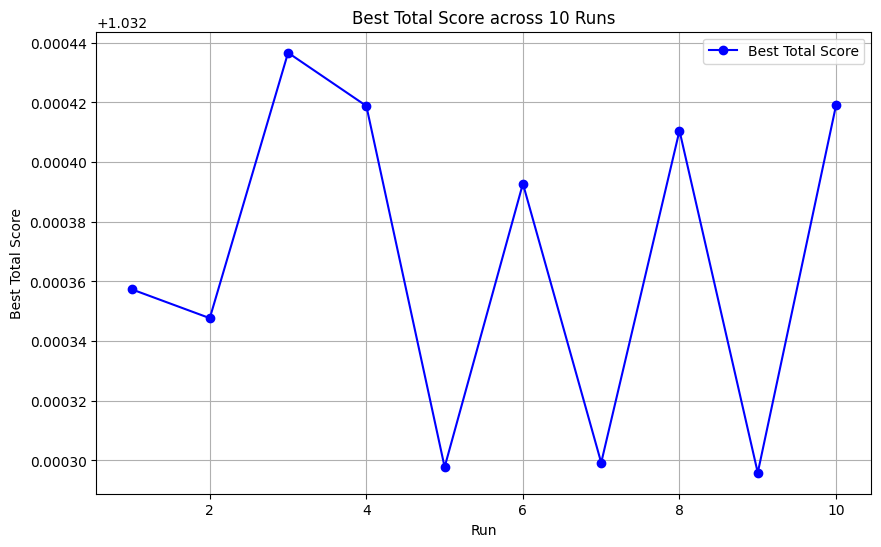

In [63]:
# Plotting the data
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(df['Run'], df['Best Total Score'], marker='o', linestyle='-', color='b', label='Best Total Score')


plt.xlabel('Run')
plt.ylabel('Best Total Score')
plt.title('Best Total Score across 10 Runs')


plt.grid(True)
plt.legend()


plt.show()

### Question 2.3c

Population Size (500): Increasing the population size to 500 gives the algorithm more solutions. The search will likely be more diverse and can have better solutions.

Generations (100): The increasing the generations also allows the algorithm to evolve easier.

Mutation Probability (μ): Increasing mutation probability to very high values can have negative impact because the convergence process will be disrupted. the algorithm will randomly jump around and miss good solutions.

In [60]:
# Parameters for the genetic algorithm
population_size = 500
generations = 100
mutation_probability = 0.7

book_list = read_books_list("data_book.csv")


results = []


for i in range(10):
    best_sequence, best_score = genetic_algorithm(population_size, generations, mutation_probability, book_list)
    results.append({'Run': i + 1, 'Best Total Score': best_score})


results_df = pd.DataFrame(results)


print(results_df)